<a href="https://colab.research.google.com/github/ddy623/Kaggle-Projects/blob/main/Unemployment_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split,GridSearchCV
# Set pandas as the default output for sklearn
from sklearn.linear_model import LinearRegression
from sklearn import set_config
from sklearn.experimental import enable_iterative_imputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # NEW
from sklearn.model_selection import train_test_split


In [6]:
# Load the dataframe. Update the path to your data file.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Project/education-economy-data.csv')
display(df.head())

,Country,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),GDP per Capita Category,Unemployment Rate (%),Continent
0,Afghanistan,43.0,0.28,1.723305e+10,2.710887,415.707417,Very Low,13.991,Asia
1,Albania,98.1,1.20,2.354718e+10,3.936625,8575.171134,Mid,10.108,Europe
2,Algeria,81.4,1.72,2.476260e+11,4.100000,5364.027950,Low,11.701,Africa
3,Andorra,100.0,3.33,3.785067e+09,2.583555,46812.448450,High,3.700,Europe
4,Angola,71.1,0.21,8.482465e+10,1.001289,2308.159767,Low,14.537,Africa


In [7]:
df.tail()

,Country,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),GDP per Capita Category,Unemployment Rate (%),Continent
186,Venezuela,97.1,1.92,3.888648e+11,1.152460,13147.680842,Mid,8.000,South America
187,Vietnam,95.4,0.82,4.297170e+11,5.046431,4282.088517,Low,1.645,Asia
188,Yemen,54.1,0.31,3.387656e+10,-4.408199,477.409029,Very Low,17.091,Asia
189,Zambia,87.4,1.19,2.757796e+10,5.367943,1330.727806,Very Low,5.905,Africa
190,Zimbabwe,89.0,0.21,3.523137e+10,5.336730,2156.034004,Low,8.759,Africa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       191 non-null    object 
 1   Literacy Rate                 191 non-null    float64
 2   Physician Density             191 non-null    float64
 3   GDP (Current USD)             191 non-null    float64
 4   GDP Growth (% Annual)         191 non-null    float64
 5   GDP per Capita (Current USD)  191 non-null    float64
 6   GDP per Capita Category       191 non-null    object 
 7   Unemployment Rate (%)         191 non-null    float64
 8   Continent                     191 non-null    object 
dtypes: float64(6), object(3)
memory usage: 13.6+ KB


In [9]:
df.describe()

,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),Unemployment Rate (%)
count,191.000000,191.000000,1.910000e+02,191.000000,191.000000,191.000000
mean,86.994764,1.848639,5.427605e+11,2.666018,18796.795066,7.522831
std,17.622097,1.679639,2.452696e+12,4.362681,30535.286667,7.092726
min,26.800000,0.010000,6.228031e+07,-20.111576,193.007146,0.130000
25%,81.800000,0.345000,1.356848e+10,0.979868,2284.223590,3.139500
50%,95.600000,1.470000,4.260088e+10,2.733798,6947.359287,5.264000
75%,99.000000,2.950000,2.651225e+11,4.987486,22322.354985,9.027000
max,100.000000,8.420000,2.772070e+13,33.802617,256580.515100,50.000000


In [18]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate correlations with 'Unemployment Rate (%)'
correlations = numerical_df.corr()['Unemployment Rate (%)'].sort_values(ascending=False)

print("Correlation with Unemployment Rate (%):")
display(correlations)

Correlation with Unemployment Rate (%):


,Unemployment Rate (%)
Unemployment Rate (%),1.000000
Literacy Rate,-0.005537
GDP Growth (% Annual),-0.089855
GDP (Current USD),-0.090067
Physician Density,-0.172694
GDP per Capita (Current USD),-0.203203


Based on the features that correlate with unemployment, the data show that GDP per Capita had more of an impact on unemployment rates than the other features.

Examine the relationship between GDP per Capita and Unemployment Rate

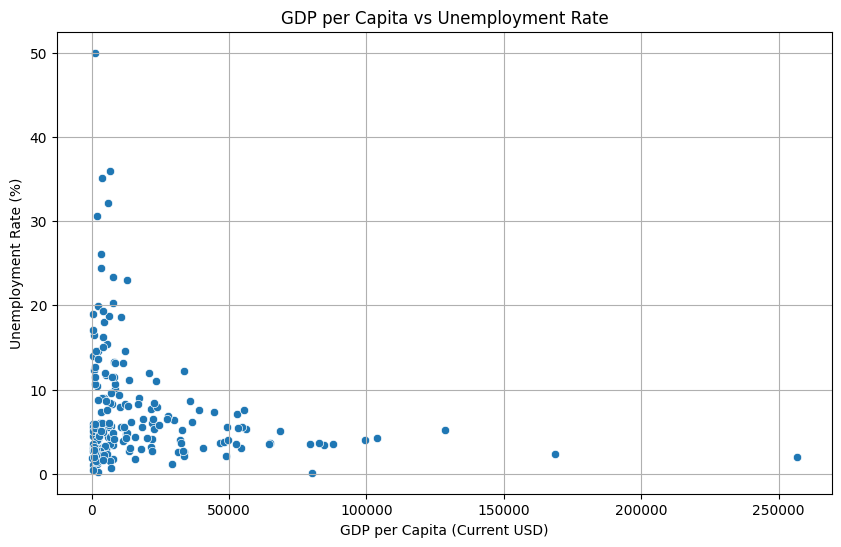

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per Capita (Current USD)', y='Unemployment Rate (%)', data=df)
plt.title('GDP per Capita vs Unemployment Rate')
plt.xlabel('GDP per Capita (Current USD)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

Mean Squared Error: 35.99302856791615
R-squared: -0.21032187699288585


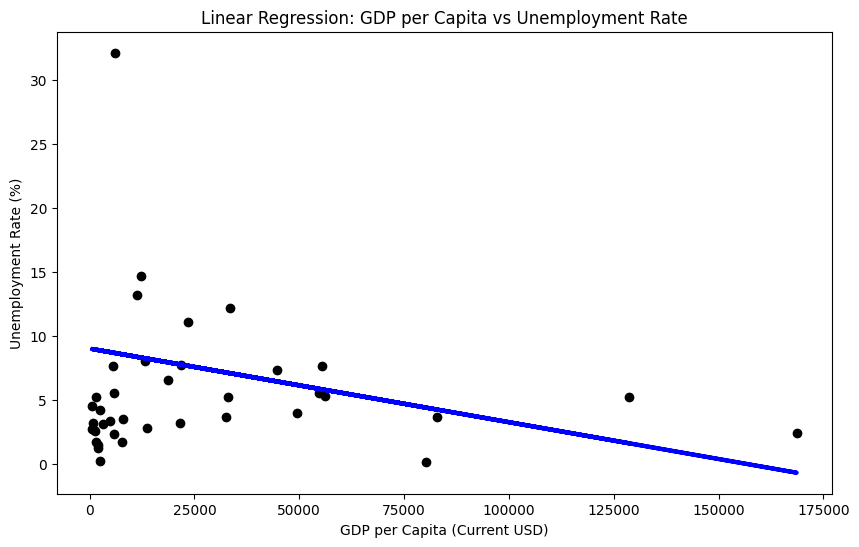

In [19]:

# Define features (X) and target (y)
X = df[['GDP per Capita (Current USD)']]
y = df['Unemployment Rate (%)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optional: Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression: GDP per Capita vs Unemployment Rate')
plt.xlabel('GDP per Capita (Current USD)')
plt.ylabel('Unemployment Rate (%)')
plt.show()

Let's see the relationship on literacy rates and unemployment

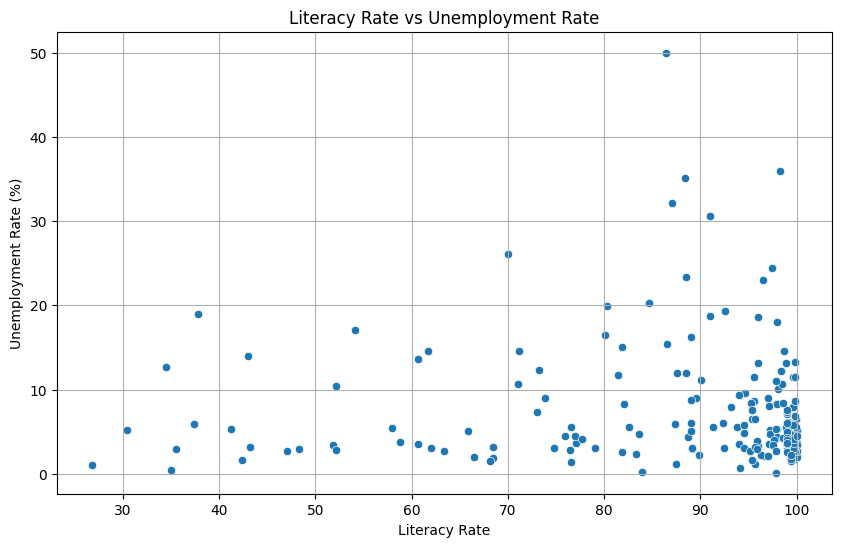

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Literacy Rate', y='Unemployment Rate (%)', data=df)
plt.title('Literacy Rate vs Unemployment Rate')
plt.xlabel('Literacy Rate')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

Examine the relationship between unemployment, literacy rates, and continent

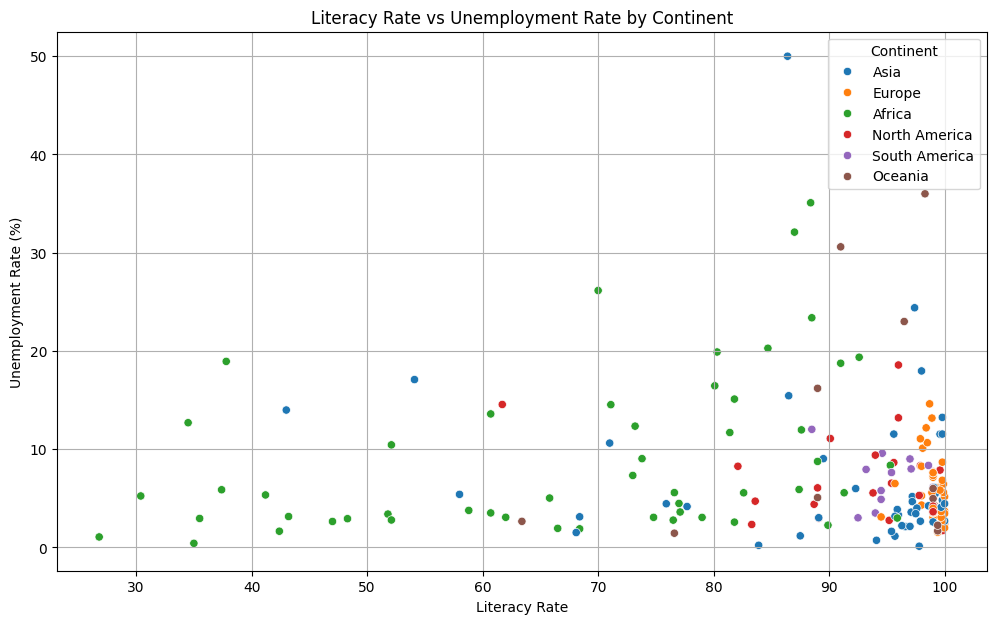

In [13]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Literacy Rate', y='Unemployment Rate (%)', hue='Continent', data=df)
plt.title('Literacy Rate vs Unemployment Rate by Continent')
plt.xlabel('Literacy Rate')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend(title='Continent')
plt.show()

Use Machine Learning to predict unemployment rate based on literacy rates

Mean Squared Error: 36.09856171684171
R-squared: -0.21387059417436838


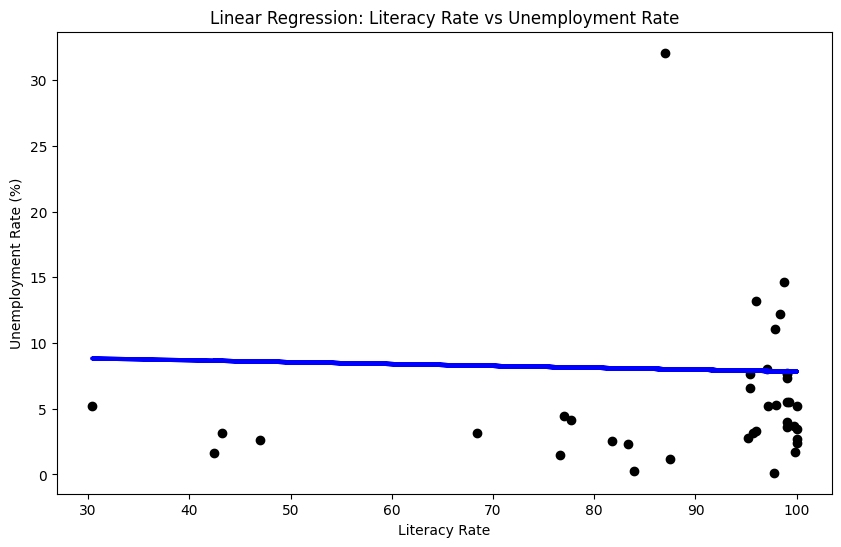

In [14]:

# Define features (X) and target (y)
X = df[['Literacy Rate']]
y = df['Unemployment Rate (%)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optional: Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression: Literacy Rate vs Unemployment Rate')
plt.xlabel('Literacy Rate')
plt.ylabel('Unemployment Rate (%)')
plt.show()

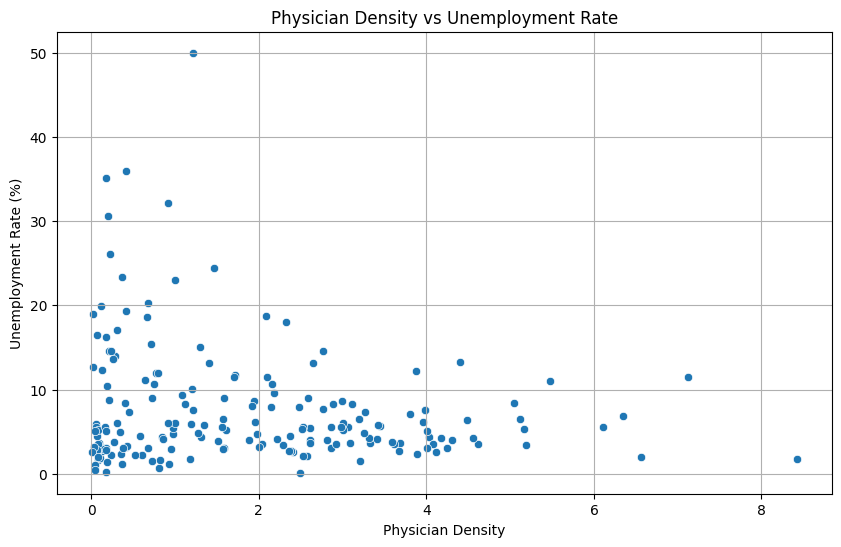

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Physician Density', y='Unemployment Rate (%)', data=df)
plt.title('Physician Density vs Unemployment Rate')
plt.xlabel('Physician Density')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

Overall, the data show that there were many factors that contributed to unemployment. However, there wasn't any feature that had a strong impact, as all the features contributed to unemployment rates.